In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.34291246 0.49986872 0.58810376 ... 0.08805439 0.32129772 0.13458588]
 [0.15565172 0.22689588 0.26694673 ... 0.03996885 0.14584055 0.06109   ]
 [0.41084792 0.59889926 0.70461482 ... 0.10549911 0.38495102 0.1612491 ]
 ...
 [0.23064794 0.33621902 0.3955672  ... 0.05922667 0.21610955 0.09052443]
 [0.05598415 0.08160895 0.09601427 ... 0.01437583 0.05245531 0.02197259]
 [0.16622807 0.24231319 0.28508545 ... 0.04268469 0.15575025 0.065241  ]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.44595106  0.39903686  0.64875462 ...  0.11280702  0.48062789
   0.12139555]
 [-0.12689673  0.09265822  0.25775027 ...  0.10791747  0.14061087
   0.13024093]
 [ 0.55711285  0.5336268   0.84882547 ... -0.00124343  0.48705393
   0.1189349 ]
 ...
 [ 0.23740654  0.33798591  0.43944633 ... -0.05584542  0.31444593
   0.0548318 ]
 [ 0.09353319  0.1350635   0.24146977 ... -0.04151396 -0.00164156
  -0.11185872]
 [ 0.11504885  0.18184409  0.27083408 ... -0.15491931  0.17499196
  -0.07

In [2]:
print(u)

[0.60475754 0.27450606 0.72456794 0.19124921 0.33014885 0.1747058
 0.65498032 0.32346845 0.84729221 0.69143335 0.82322052 0.38853978
 0.59123172 0.0652725  0.66851267 0.65259172 0.79182787 0.68428477
 0.39651765 0.25573671 0.0640534  0.15216015 0.24088323 0.70188295
 0.60585002 0.50386073 0.02616206 0.67008476 0.6756543  0.57657258
 0.40474443 0.94041688 0.8950844  0.49006006 0.04823796 0.69697325
 0.05471044 0.12996837 0.13578004 0.86448594 0.71594478 0.28649908
 0.34267011 0.32435556 0.26849636 0.82678995 0.703558   0.40676877
 0.09873318 0.29315843]


In [3]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [4]:
mycebmf= cEBMF(data    = noisy_matrix,
               prior_L = "exp",
               prior_F = "exp",K=10)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

U, s, Vt = np.linalg.svd(mycebmf.data, full_matrices=False)
mycebmf.init_LF(use_nmf=True)
U
mycebmf.L
 

c:\Users\WD\anaconda3\envs\torch_env\lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


array([[5.67606091e-01, 2.01801345e-01, 1.93518564e-01, 7.79211760e-01,
        1.69585630e-01, 0.00000000e+00, 6.15732223e-02, 4.16435450e-01,
        4.52818200e-02, 7.53829330e-02],
       [2.80806541e-01, 1.92089722e-01, 0.00000000e+00, 3.62618774e-01,
        1.20888270e-01, 7.82791898e-02, 1.39963448e-01, 0.00000000e+00,
        0.00000000e+00, 8.30464438e-03],
       [5.65752208e-01, 2.80647278e-01, 9.29084659e-01, 4.15466249e-01,
        0.00000000e+00, 3.11812274e-02, 2.09389076e-01, 6.20822489e-01,
        7.10619241e-02, 5.21997511e-02],
       [5.59782684e-01, 3.60919029e-01, 0.00000000e+00, 0.00000000e+00,
        1.15297653e-01, 3.55966315e-02, 0.00000000e+00, 0.00000000e+00,
        1.25336843e-02, 4.78043631e-02],
       [0.00000000e+00, 1.81516275e-01, 1.53021157e-01, 7.06527352e-01,
        0.00000000e+00, 3.48565318e-02, 0.00000000e+00, 1.52208522e-01,
        2.18536910e-02, 0.00000000e+00],
       [1.30730033e-01, 6.48021027e-02, 0.00000000e+00, 0.00000000e+00,
   

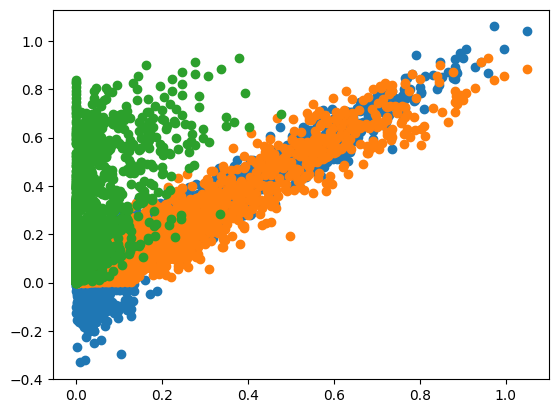

In [5]:
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [6]:
mycebmf.F

array([[6.86427131e-02, 1.63487475e-02, 6.71775267e-02, 7.91637674e-02,
        1.20698072e-01, 2.92085391e-02, 1.31145120e-01, 5.92162549e-01,
        5.21737039e-01, 1.98010042e-01],
       [2.67782986e-01, 0.00000000e+00, 2.59319693e-01, 7.74930194e-02,
        2.18643323e-01, 6.19945712e-02, 9.51475799e-02, 1.41425237e-01,
        4.20814008e-01, 5.88438392e-01],
       [3.01218122e-01, 8.78927708e-02, 2.26909965e-01, 1.69140652e-01,
        1.44572020e-01, 1.96755677e-01, 2.49044925e-01, 4.75800037e-01,
        1.36120260e-01, 2.53777027e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.19770139e-01,
        0.00000000e+00, 4.22991663e-02, 7.73503304e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.01775366e-01, 3.45110267e-01, 0.00000000e+00, 2.75992334e-01,
        2.97019240e-02, 1.38471317e+00, 6.56678259e-01, 8.72257873e-02,
        8.51023421e-02, 0.00000000e+00],
       [1.50859626e-02, 4.90390621e-02, 1.47909731e-01, 1.56583369e-01,
   

In [7]:
mycebmf.iter()

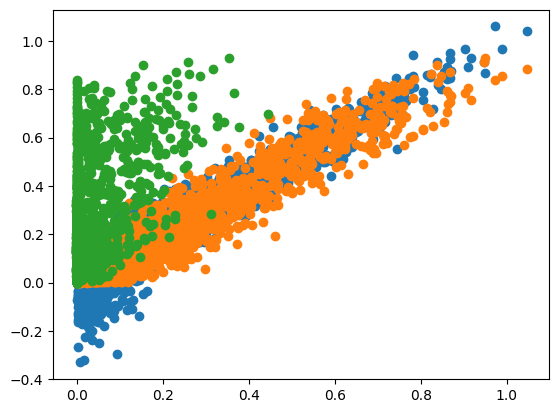

In [8]:
 
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [28]:
for i in range(40):
    mycebmf.iter()


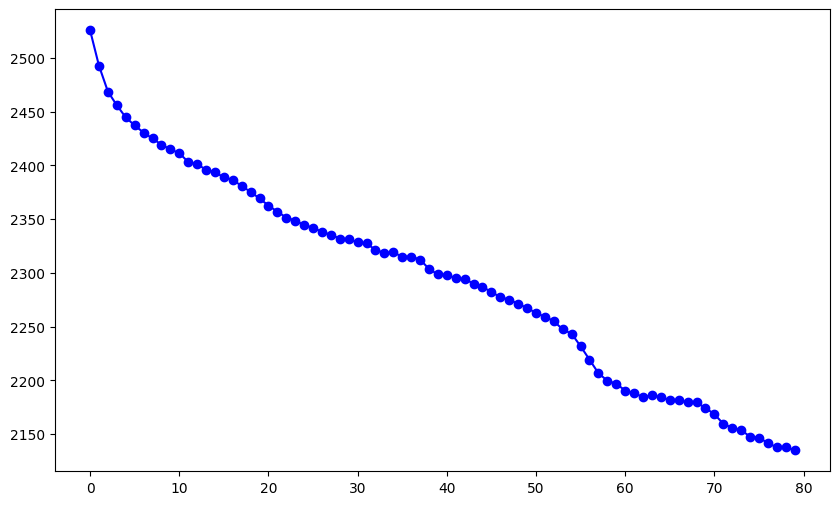

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[2:], marker='o', linestyle='-', color='b')

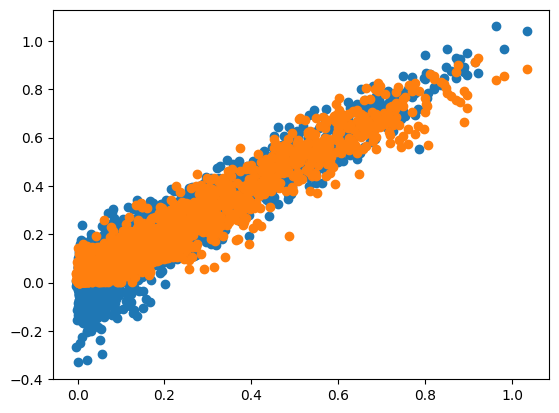

In [30]:
 
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)


[5.62174753e-01 2.78363381e-10 2.80955086e-10 2.83109393e-10
 2.83311397e-10 2.78993152e-10 2.67703332e-10 2.50957398e-10
 2.38395040e-10 2.48496120e-10 3.15283633e-10 9.54788432e-09
 5.53072658e-04 3.03007396e-01 1.34229714e-01 3.50504077e-05
 4.15936991e-10 1.94066932e-10]


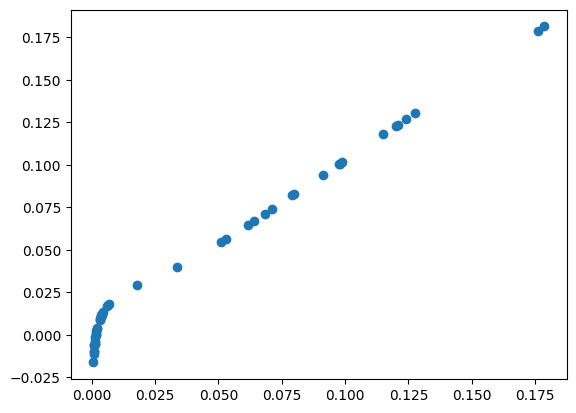

In [32]:
k=1
mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
 

ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     = "exp",
                      verbose=False
                      )
 
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2
print(ash_obj.pi
      )
plt.scatter(ash_obj.post_mean, lhat)

In [34]:
mycebmf.L

array([[ 6.99792877e-02,  1.79588841e-03,  1.37579411e-01,
         1.71664879e-01, -2.49541341e-03, -1.25246204e-03,
        -1.99577818e-03,  1.47853360e-01,  1.15495967e-03,
        -1.60555632e-04],
       [ 1.20119892e-01,  5.30929640e-02, -4.54331202e-05,
         1.04027867e-01, -1.70227831e-05,  1.97100011e-03,
         1.75367612e-02,  1.05511979e-03, -7.84154690e-04,
         4.38629766e-04],
       [ 5.35522848e-02,  1.00652210e-03,  2.90592253e-01,
         9.70254242e-02, -8.96610320e-04, -5.40849986e-04,
        -6.49436493e-04,  2.09127307e-01, -5.42829337e-04,
        -5.05826960e-04],
       [ 1.42600670e-01,  9.78297070e-02,  1.48509815e-03,
         3.52306124e-05,  3.97593976e-04,  3.08745439e-05,
         1.03530299e-03,  2.34003598e-03,  4.66237660e-04,
        -1.58738967e-05],
       [-1.40945303e-05,  1.64371647e-03,  2.33674562e-03,
         1.48142844e-01, -1.46932313e-02, -6.72894676e-05,
        -1.81325723e-03,  1.12758376e-01,  2.13148887e-04,
        -1.

In [35]:
normal_means_loglik(x=lhat , 
                                            s=  s_l,
                                            Et=ash_obj.post_mean,
                                            Et2= ash_obj.post_mean2
                                           )

np.float64(-3951.4182701767077)

In [36]:
ash_obj.log_lik


np.float64(89.62135483921678)

In [37]:
x=lhat

s=  s_l
Et=ash_obj.post_mean
Et2= ash_obj.post_mean2
print(Et2)
print(Et[12])
lhat[11] 




[0.00179589 0.05309297 0.00100652 0.09782971 0.00164372 0.00055223
 0.00317937 0.0060334  0.09879368 0.06408809 0.12417283 0.00077318
 0.01769423 0.03360946 0.00408943 0.08000085 0.0036575  0.06837777
 0.00153991 0.0010817  0.00136852 0.00104427 0.07125025 0.17606634
 0.00194638 0.00150717 0.00379796 0.17861763 0.00102713 0.00642113
 0.00385689 0.12009951 0.12777796 0.0616575  0.0011906  0.09109667
 0.00082223 0.00687099 0.00320108 0.00202508 0.00355593 0.00106606
 0.05108747 0.07914582 0.1151319  0.09749647 0.12077027 0.00073896
 0.00449053 0.00307878]
0.017694231898479587


np.float32(-0.010323702)

In [38]:
-0.5 * np.sum(np.log(2 * np.pi * s**2) + (1 / s**2) * (Et2 - 2 * x * Et + x**2))

np.float64(-3951.4182701767077)

In [39]:
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     = "exp",
                      verbose=False
                      )
print(ash_obj.log_lik)


89.62135483921678


In [40]:
ash_obj.pi

array([5.62174753e-01, 2.78363381e-10, 2.80955086e-10, 2.83109393e-10,
       2.83311397e-10, 2.78993152e-10, 2.67703332e-10, 2.50957398e-10,
       2.38395040e-10, 2.48496120e-10, 3.15283633e-10, 9.54788432e-09,
       5.53072658e-04, 3.03007396e-01, 1.34229714e-01, 3.50504077e-05,
       4.15936991e-10, 1.94066932e-10])

In [41]:
betahat   =lhat
sebetahat =s_l 
prior     = "exp"
print(prior)

scale=autoselect_scales_mix_exp(betahat  = betahat,
                                         sebetahat= sebetahat,
                                          mult=np.sqrt(2))
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
optimal_pi = optimize_pi( np.exp(L),
                                 penalty=10,
                                 verbose=True) 
print(optimal_pi)

exp
[5.62174518e-01 5.11455285e-15 2.45754453e-15 1.16291157e-15
 4.96777760e-16 1.84409926e-16 6.39789540e-17 2.25808073e-17
 1.12904036e-17 1.05377101e-16 1.22470772e-13 9.00555644e-09
 5.53053000e-04 3.03011125e-01 1.34226257e-01 3.50392044e-05
 1.24349344e-11 3.76346788e-18]


[0.00179589 0.05309296 0.00100652 0.0978297  0.00164372 0.00055224
 0.00317938 0.00603342 0.09879367 0.06408808 0.12417282 0.00077318
 0.01769425 0.03360947 0.00408944 0.08000085 0.00365751 0.06837776
 0.00153991 0.0010817  0.00136852 0.00104428 0.07125024 0.17606633
 0.00194639 0.00150718 0.00379797 0.17861762 0.00102714 0.00642114
 0.00385689 0.1200995  0.12777795 0.0616575  0.0011906  0.09109666
 0.00082223 0.006871   0.00320109 0.00202508 0.00355593 0.00106606
 0.05108747 0.07914581 0.11513189 0.09749647 0.12077026 0.00073896
 0.00449054 0.00307879]


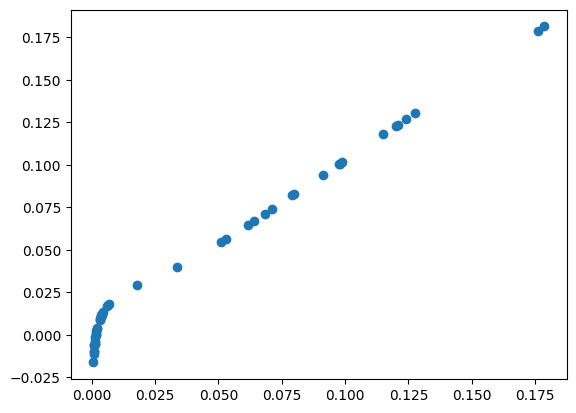

In [42]:
optimal_pi
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat= betahat ,
                        sebetahat=sebetahat ,
                                 log_pi=log_pi , 
                                 scale=scale)
plt.scatter(out.post_mean, lhat)
print(out.post_mean)


In [43]:
print(  np.sum(np.exp(L)*optimal_pi, axis=1) )

[17.8144127   2.79644405 15.71869837  1.53455599 17.80440434  8.98205529
 15.94086496 11.94034512  1.51500919  2.40936436  1.08253251 13.16574615
  6.0087885   3.82959346 14.46015646  1.94648797 15.14359472  2.27445023
 17.73034833 16.25082926 17.44343241 16.00026756  2.18847326  0.54917039
 17.7390869  17.69302259 14.91676254  0.53131267 15.87618121 11.53653755
 14.82287488  1.14232668  1.03228817  2.48947948 16.83863384  1.67847984
 13.83775041 11.10188866 15.9041039  17.67447541 15.31007147 16.14942417
  2.87525703  1.96887575  1.21985259  1.541373    1.13225236 12.64636053
 13.86563559 16.11139006]


In [44]:
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
print( np.exp(L)*optimal_pi )

[[1.50325631e+01 1.37533524e-13 6.60407287e-14 3.11335192e-14
  1.31631409e-14 4.77656459e-15 1.58703751e-15 5.20801466e-16
  2.33344979e-16 1.87435488e-15 1.80213040e-12 1.05810437e-07
  5.03678575e-03 2.08891323e+00 6.87767832e-01 1.31625421e-04
  3.39007483e-11 7.39138965e-18]
 [1.06675537e-02 1.32512673e-16 7.42850534e-17 4.50088140e-17
  2.88715498e-17 2.04451610e-17 1.71317577e-17 1.57820323e-17
  1.84926073e-17 3.30517203e-16 5.93119887e-13 5.56815182e-08
  3.74383130e-03 1.99509003e+00 7.86771248e-01 1.71329335e-04
  4.83827908e-11 1.12628543e-17]
 [1.39655839e+01 1.22797492e-13 5.80457031e-14 2.67910980e-14
  1.10191217e-14 3.86460294e-15 1.23462648e-15 3.88650567e-16
  1.67225327e-16 1.29511706e-15 1.20738791e-12 6.91530399e-08
  3.22908145e-03 1.31988641e+00 4.29917303e-01 8.16334892e-05
  2.09058049e-11 4.53949586e-18]
 [1.14597140e-09 2.01336553e-23 1.50373535e-23 1.89116159e-23
  7.67277107e-23 9.19306029e-22 1.14713905e-20 8.58898303e-20
  4.59416713e-19 2.41901645e-17 9

In [45]:
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)

print(L)

threshold_loglikelihood =  -300  # Example of a very small threshold
L = np.maximum(L,  (threshold_loglikelihood))
print(L)
log_lik =    np.sum(np.log(np.sum(np.exp(L)*optimal_pi, axis=1)))

[[ 3.28616167e+00  3.29177772e+00  3.29110896e+00  3.28735819e+00
   3.27703308e+00  3.25431572e+00  3.21107017e+00  3.13826860e+00
   3.02856482e+00  2.87847446e+00  2.68885239e+00  2.46380740e+00
   2.20906957e+00  1.93062971e+00  1.63392447e+00  1.32349261e+00
   1.00292728e+00  6.74974922e-01]
 [-3.96460556e+00 -3.65316697e+00 -3.49900820e+00 -3.25182378e+00
  -2.84528609e+00 -2.19941491e+00 -1.31762027e+00 -3.58228213e-01
   4.93417919e-01  1.14311336e+00  1.57752414e+00  1.82180651e+00
   1.91241094e+00  1.88467494e+00  1.76841068e+00  1.58712008e+00
   1.35863438e+00  1.09616924e+00]
 [ 3.21253896e+00  3.17844662e+00  3.16206799e+00  3.13714283e+00
   3.09924462e+00  3.04245308e+00  2.95996957e+00  2.84558034e+00
   2.69538903e+00  2.50881102e+00  2.28834215e+00  2.03848025e+00
   1.76449916e+00  1.47153144e+00  1.16406601e+00  8.45772024e-01
   5.19517060e-01  1.87475120e-01]
 [-2.00110702e+01 -1.93529630e+01 -1.89118912e+01 -1.79344163e+01
  -1.56833904e+01 -1.22090526e+01 -8.

In [46]:
np.exp(L[1,]) 

array([0.01897552, 0.02590895, 0.03022735, 0.03870356, 0.05811764,
       0.11086801, 0.26777177, 0.69891356, 1.63790489, 3.13651828,
       4.84295051, 6.18301807, 6.76938973, 6.58421382, 5.86153013,
       4.88964683, 3.89087623, 2.9926798 ])

In [47]:
i=6
print(scale)
print(betahat[i]/sebetahat[i])
convolved_logpdf_exp(betahat=betahat[i],
                                         sebetahat=sebetahat[i],  
                                         scale=scale)

[0.         0.00106312 0.00150348 0.00212624 0.00300696 0.00425248
 0.00601392 0.00850496 0.01202784 0.01700993 0.02405567 0.03401986
 0.04811134 0.06803972 0.09622269 0.13607943 0.19244538 0.27215886]
0.63493294


array([3.09581349, 3.137024  , 3.15116921, 3.16803257, 3.18560988,
       3.19886171, 3.19873353, 3.173139  , 3.11041906, 3.003203  ,
       2.85003123, 2.65435706, 2.4223837 , 2.16110931, 1.87710073,
       1.57593463, 1.26206806, 0.93892687])